# Data Science mid Term Project

<h3>Introduction</h3>

<h4>Domain Specific Area and Objective</h4>

<p>The pricing of different auto-mobile’s depending on their features , this means that depending on which brand , cylinders , horsepower and other features of vehicles will be used to determine the price of a vehicle. The auto-mobile industry is a very wealthy industry <a href = 'https://en.wikipedia.org/wiki/Automotive_industry'>[1]</a> that contains some of the most successful businesses in the world. An industry that contributes a lot to our everyday society , it is important to make well informed decisions before entering this market. The pricing of cars is often ambiguous , not having an understanding of cars and which of their respective features add worth to them could mean that an ill informed decision is made and a person could possibly be over paying. </p>
    
<p> The objective of the project will be to be able to determine a linear relationship between prices of a cars and features ,examples of these features will be number of doors , company , horsepower etc. I objective will then be to predict based off of key features of the dataset using a linear regression model. In the domain the goal is also to improve the buyers knowledge in the field of cars and to be able to determine if the valuation of a vehicle is correct</p>
    
<p>  A linear regression model can be used in this domain since cars inherit numerical data regarding a wide range of features that should increase with the price of the car. Car power is usually measured by torque or horsepower , the higher these values are the higher the prices usually are<a href ='https://www.carwow.co.uk/blog/highest-horsepower-cars#gref'>[2]</a>. Fuel options such as having worse fuel economy (higher per km) usually relates to more expensive cars <a href='https://www.caranddriver.com/features/g30256394/worst-fuel-economy-cars/'>[3]</a>. If a car has higher cylinders it usually means it has worse fuel economy and therefore a higher price <a href='https://www.capitalone.com/cars/learn/finding-the-right-car/4-cylinder-vs-6-cylinder-which-is-more-fuel-efficient/1302'>[4] </a> </p>

<p> From these few features we can see the linear tendancies of prices compared to car features and therefore continue to build a linear regression model on feature and price values of cars <p>

<h4>The Dataset</h4>

<p>The dataset I will be using will be the “2023 Car Model Dataset” founded on <a href='https://www.kaggle.com/datasets/peshimaammuzammil/2023-car-model-dataset-all-data-you-need'>Kaggle</a>.
The dataset is still growing and new data is being added frequently.
</p> 
<p>The dataset consists of 403 different rows of cars and 13 features , the data types of all these features are strings and therefore have to be changed during pre-processing. There are values who should be numerical such as fuel economy , horsepower , torque , number of cylinders , number of doors , model year range and price </p> 


<p><strong> All the features of the cars dataset are as follows : </strong></p>
<p>1)Model - The name of the car model.</p>
<p>2)Engine Type - The name of the car model.</p>
<p>3)Body Type - The name of the car model.</p>
<p>4)Price - The price of the given car in US dollars.</p>
<p>5)Torque - Torque of a car measured in newton meters</p>
<p>6)Fuel Economy - The fuel usage of a car measured as liters per 100km.</p>
<p>7)Transmission Type - Type of transmission such as manual or automatic</p>
<p>10)Drivetrain - Type of drivetrain such as 4 wheel drive or front wheel drive.</p>
<p>11)Horse Power - Car horsePower as an integer</p>
<p>12)Number of Doors- Total doors of the car</p>
<p>13)Company (Brand) -  The name of the car manufacturer which is a string .</p>
<p>14)Model Year Range - The range of model years that the car was produced.</p>
<p>15)Number of Cylinders - The number of cylinders of each vehicle.</p>


<p>
The challenge or creative problem of my project will be to transform all thew data during pre-processing into the correct data type and correct measurement since the dataset is not consistent with the metrics used.
</p> 

<h3>Project Implementation</h3>

In [83]:
# Libraries to Import for implementing project
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import re
import scipy.sparse as sp
import scipy.stats as sc 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer

<h3>Data Pre-Processing</h3>

1) Reading Database from local file 

The database is stored as a csv file therefore using pandas to read the file as a database will be sufficient

In [2]:
# use pandas method to read the csv file
data = pd.read_csv('Car_Models.csv')

2) Inspecting The database and data types 

Viewing the first part of the database for inspection , we can see that most values seem to be measured by the same metrics

In [3]:
data.head()

,Company,Model,Horsepower,Torque,Transmission Type,Drivetrain,Fuel Economy,Number of Doors,Price,Model Year Range,Body Type,Engine Type,Number of Cylinders
0,Ferrari,812 Superfast,789 hp,530 lb-ft,7-speed automatic,RWD,13/20 mpg,2,"$366,712",2018 - Present,Coupe,6.5L V12,12
1,Ferrari,F8 Tributo,710 hp,568 lb-ft,7-speed automatic,RWD,15/19 mpg,2,"$276,550",2020 - Present,Coupe,3.9L V8,8
2,Ferrari,Roma,611 hp,560 lb-ft,8-speed automatic,RWD,16/24 mpg,2,"$218,750",2021 - Present,Coupe,3.9L V8,8
3,Ferrari,Portofino M,612 hp,561 lb-ft,8-speed automatic,RWD,16/22 mpg,2,"$254,475",2021 - Present,Convertible,3.9L V8,8
4,Ferrari,SF90 Stradale,986 hp,590 lb-ft,8-speed automatic,AWD,18 mpg (combined),2,"$625,000",2020 - Present,Coupe,4.0L V8,8


Using the info() method on the data we can see that all the data types are of type string/object. This will be problematic since strings/objects will have to be converted to numerical data in pre-processing. Furthermore I have discovered that inconsistent data types were used e.g. Fuel Economy is measured in both miles per gallon and km/l and will have to be converted to one type of measurement. We will have to change all values that contain dashes or slashes and use the median values e.g. 16/24 mpg will have to become 20 mpg and then converted to km/l.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              404 non-null    object
 1   Model                404 non-null    object
 2   Horsepower           404 non-null    object
 3   Torque               404 non-null    object
 4   Transmission Type    404 non-null    object
 5   Drivetrain           404 non-null    object
 6   Fuel Economy         399 non-null    object
 7   Number of Doors      404 non-null    object
 8   Price                398 non-null    object
 9   Model Year Range     403 non-null    object
 10  Body Type            403 non-null    object
 11  Engine Type          403 non-null    object
 12  Number of Cylinders  402 non-null    object
dtypes: object(13)
memory usage: 41.2+ KB


From the above summary of the database we can see that there are a few null values and all data types are objects.strings ,furthermore we can see that the database has 404 rows and 12 columns that are features of cars.

<h3>General Fixes</h3>

We remove all rows containing 'None' values and reset the index of the database since we will be iterating over the index for pre-processing

In [5]:
data = data.replace('N/A',None)
df_cars = data.dropna().reset_index(drop=True)

In [6]:
print('New length of each column of the database is : ' + str(len(df_cars)))

New length of each column of the database is : 397


<h3>Fixing horsepower</h3>

For fixing horsepower we will create a copy of the database column and then iterate over the column , when iterating over the column we will use regex strings to replace textual data and keep numerical data . Furthermore I will be calculating averages and converting all values to be numerical float values.

In [7]:
# Initiate arrays to be added as indexes and values later
horsepowerColumnValues = df_cars['Horsepower'].copy()
valuesContainingDashes = []
horsePowerValuesContainingDashesIndex = []
horsePowerValuesIndex = []
horsepowerValuesAsFloat = []
finalHorsepowerValuesContainingDashesAsFloat = []

In [8]:
# I wrote this code

#loop through all column values in horesepower
for i in range(0,len(horsepowerColumnValues)):
    #check if dashes is in horsepower column values
    if '-' in horsepowerColumnValues[i]:
        # append index and values to array initialized above
        valuesContainingDashes.append(horsepowerColumnValues[i])
        horsePowerValuesContainingDashesIndex.append(i)
    else:
        # Remove textual data from horsepower column values
        horsepowerColumnValues[i] =  re.sub(r'[A-Za-z()]+','',horsepowerColumnValues[i])
        #remove emty strings from horespower column values
        horsepowerColumnValues[i] = horsepowerColumnValues[i].replace(' ','')
        horsePowerValuesIndex.append(i)
        # check if comma or @ values in horsepower column values
        if ',' or '@' in horsepowerColumnValues[i]:
            # ensure length of strings is larger then 5 so that we ensure there arle multiple strings
            if len(horsepowerColumnValues[i]) > 5:
                # only take first 3 values of horsepower column values
                horsepowerColumnValues[i] = horsepowerColumnValues[i][:3]
            else:
                # remove comma from horsepower column values
                horsepowerColumnValues[i] = horsepowerColumnValues[i].replace(',','')
                
        # append values as float to be merged later 
        horsepowerValuesAsFloat.append(float(horsepowerColumnValues[i]))
        
# End of code I wrote

In [9]:
# I wrote this code

# loop through values that contain dashes in horsepower
for i in range(0,len(valuesContainingDashes)):
    # check if the string 'kW' is in the string of the column
    if i < len(valuesContainingDashes) and 'kW' in valuesContainingDashes[i]:
        # regex string not coded by me , I used chat GPT to assist with regex strings
        valuesContainingDashes[i]= re.sub(r'(\d{3})\s?(PS|kW)', '', valuesContainingDashes[i])
    # check if hp or bhp or parenthesis are in the string
    if i < len(valuesContainingDashes) and 'hp' or 'bhp' or '(' or ')'in valuesContainingDashes[i]:
        # remove textual data from string values , regex strings were assisted by chatGPT
        valuesContainingDashes[i] = re.sub(r'[A-Za-z()]+','',valuesContainingDashes[i])
    # remove empty strings from column values
    valuesContainingDashes[i] = valuesContainingDashes[i].replace(' ','')
    # ensure strings contain dashes and are a appropriate length for calculating average values
    if i < len(valuesContainingDashes) and '-' in valuesContainingDashes[i] and len(valuesContainingDashes[i]) > 4:
        # split values with dashes to calculate average values to be merged later
        HorsepowerValues = valuesContainingDashes[i].split('-')
        averageValue = (float(HorsepowerValues[0]) + float(HorsepowerValues[1]))/2
        finalHorsepowerValuesContainingDashesAsFloat.append(averageValue)
    else:
        # remove dashes from values who only contain singular values
        valuesContainingDashes[i] = valuesContainingDashes[i].replace('-','')
        finalHorsepowerValuesContainingDashesAsFloat.append(float(valuesContainingDashes[i]))
        
# End of code I wrote

The following function will take an index , values and a column as input , it will replace the values at given index for a given column. The function will be used throughout the pre-processing steps.

In [10]:
# I wrote this code

# the below function will merge values at an index for a given column
def mergeIndexAndValue(indexes,values,column):
    for index , value in zip(indexes,values):
        column[index] = value

In [11]:
mergeIndexAndValue(horsePowerValuesContainingDashesIndex,finalHorsepowerValuesContainingDashesAsFloat,horsepowerColumnValues)
mergeIndexAndValue(horsePowerValuesIndex,horsepowerValuesAsFloat,horsepowerColumnValues)

In [12]:
df_cars['Horsepower'] = horsepowerColumnValues
df_cars['Horsepower'] = pd.to_numeric(df_cars['Horsepower'])

# End of code I wrote

<h3>Fixing Torque</h3>

Some torque values were measured in lb-ft and other values in newton meter. In the following code I will remove strings and spaces from the torque column , calculate average values between dashes and slashes , remove punctuation and change the data type from string to float for all values after pre-processing.

In [13]:
# initiate values and indexes to be used for mergeing later on
torqueColumnValues = df_cars['Torque']
columnValues = df_cars['Torque'].copy()

torqueFloatValuesContainingDashesLb_ft = []
torqueFloatValuesContainingDashesLb_ftIndex = []

torqueFloatValuesContainingDashes = []
torqueFloatValuesContainingDashesIndex = []

lb_ft_index = []

In [14]:
# I wrote this code

# iterate through the column by index i
for i in range(0,len(columnValues)):
    
    # remove spaces (' ') in the strings
    columnValues[i] = columnValues[i].strip()
    
    # If the values contain Nm and not lb-ft
    if 'Nm' in columnValues[i] and 'lb-ft'not in columnValues[i]:
        
        # split the values with Nm to take the values before the 'Nm' field
        columnValues[i] = columnValues[i].split('Nm')[0]
        # remove textual values with regex string 
        # regex sting not my own code but generated by chatgpt
        columnValues[i] = re.sub(r'[A-Za-z()]+','',columnValues[i])
 
    # If the values contain lb-ft and not Nm
    if 'lb-ft' in columnValues[i]  and 'Nm' not in columnValues[i]:
        
        # append all indexes that are lb-ft to be changed later to newton meter
        lb_ft_index.append(i)
        # split the values with Nm to take the values before the 'lb-ft' field
        columnValues[i] = columnValues[i].split('lb-ft')[0]
        # regex sting not my own code but generated by chatgpt
        columnValues[i] = re.sub(r'[A-Za-z()]+','',columnValues[i])
        
        # if the string contains a dash 
        if '-' in columnValues[i]:
            
            # new value to be set as splitting the string with '-' 
            torqueDashesValues = columnValues[i].split('-')
            # calculate average by setting each index of the split value as a float 
            averageDashesValue = (float(torqueDashesValues[0]) + float(torqueDashesValues[1]))/2
            
            # append indexes and values to be assigned later in the column
            torqueFloatValuesContainingDashesLb_ftIndex.append(i)
            torqueFloatValuesContainingDashesLb_ft.append(averageDashesValue)
            
        # if comma in string
        elif ',' in columnValues[i]:
            
            # remove comma with empty string so that floating point values are more sensible (1,700 becomes 1700)
            columnValues[i] = columnValues[i].replace(',','');
    
    # this values is hard coded since it had very strange conditions that were never met
    columnValues[334] = '366.0'
    
    # if no type specified , the database said the standard was newton meter so we assume newton meters
    if 'Nm' and 'lb-ft' not in columnValues[i] and '-' in columnValues[i]:
        # belowe we ensure spacing is correct , split by dash value and calculate the averages
        columnValues[i] = columnValues[i].replace(' ','')
        torqueRangeValues = columnValues[i].split('-')
        averageRangeValues = (float(torqueRangeValues[0]) + float(torqueRangeValues[1]))/2
        
        # append indexes and averages to be assigned later
        torqueFloatValuesContainingDashesIndex.append(i)
        torqueFloatValuesContainingDashes.append(averageRangeValues)

In [15]:
# Merge the indexes of averages values in the torque column values 
mergeIndexAndValue(torqueFloatValuesContainingDashesIndex,torqueFloatValuesContainingDashes,columnValues)
mergeIndexAndValue(torqueFloatValuesContainingDashesLb_ftIndex,torqueFloatValuesContainingDashesLb_ft,columnValues)

In [16]:
# Set the new torque values to the calculated array and change to numerical
df_cars['Torque'] = columnValues
df_cars['Torque'] = pd.to_numeric(df_cars['Torque'])

In [17]:
# I wrote this code

# create a final column data array to convert data that need to change a metric
finalTorque = df_cars['Torque'].copy()

for i in lb_ft_index:
    
    # conversion from lb-ft to newton Meter
    finalTorque[i] = finalTorque[i] * 1.3558

# Assign values in column and round values to 2 decimal places
df_cars['Torque'] = finalTorque.round(2)

<h3>Fixing Fuel Economy</h3>

In [18]:
# initialize valuesand index arrays to be merged later on as floating values
fuelEconomyValues = df_cars['Fuel Economy'].copy()

fuelEconomyValuesContainingDashesKM = []
fuelEconomyValuesContainingDashesKMIndex = []

fuelEconomyValuesContainingSlashesKM = []
fuelEconomyValuesContainingSlashesKMIndex = []

fuelEconomyValuesContainingDashesKML = []
fuelEconomyValuesContainingDashesKMLIndex = []

fuelEconomyValuesContainingSlashesMPG = []
fuelEconomyValuesContainingSlashesMPGIndex =[]

fuelEconomyValuesContainingDashesMPG =[]
fuelEconomyValuesContainingDashesMPGIndex=[]

milesPerGallon_index = []

In [19]:
# the below values were hard coded since they were eronious and odd

fuelEconomyValues[23] = '18.5'
fuelEconomyValues[24] = '18'
fuelEconomyValues[25] = '19.5'
fuelEconomyValues[26] = '24.5'
fuelEconomyValues[27] = '21.5'
fuelEconomyValues[28] = '22'
fuelEconomyValues[29] = '24'

fuelEconomyValues[105] = '28.5'
fuelEconomyValues[106] = '21'
fuelEconomyValues[107] = '25'
fuelEconomyValues[108] = '30'
fuelEconomyValues[109] = '22.5'

fuelEconomyValues[330] = '17'
fuelEconomyValues[331] = '18'
fuelEconomyValues[332] = '22'
fuelEconomyValues[333] = '52.3'
fuelEconomyValues[334] = '20'

In [20]:
# I wrote this code

# loop through fuel economy column values
for i in range(0,len(fuelEconomyValues)):
    
    # remove spaces from all empty strings
    fuelEconomyValues[i] = fuelEconomyValues[i].replace(' ','')
    
    # ensurte N?A values are not part of the calculation
    if 'N/A' not in fuelEconomyValues[i]:
        
        # check if kmpl in each column string
        if 'kmpl' in fuelEconomyValues[i]:
            # remove textual data from each column values
            fuelEconomyValues[i] = re.sub(r'[A-Za-z()]+','',fuelEconomyValues[i])
            
            # check if dashes in column values strings and length large enough for calculation of average
            if '-' in fuelEconomyValues[i] and '/' not in fuelEconomyValues[i] and len(fuelEconomyValues[i])> 4:
                
                # split dashes values from strings to calculate average values between strings
                fuelEconomyDashValuesKM = fuelEconomyValues[i].split('-')
                averageDashesValueKM = (float(fuelEconomyDashValuesKM[0]) + float(fuelEconomyDashValuesKM[1]))/2
                
                # append indexes and arrays to be merged later on
                fuelEconomyValuesContainingDashesKMIndex.append(i)
                fuelEconomyValuesContainingDashesKM.append(averageDashesValueKM)

                
            # if slashes in column data strings and values are long enough to calculate averages
            if '/' in fuelEconomyValues[i] and '-' not in fuelEconomyValues[i] and len(fuelEconomyValues[i])> 4:
                
                # split values on slashes and calculate average value of each split string value
                fuelEconomySlashValuesKM = fuelEconomyValues[i].split('/')
                averageSlashesValueKM = (float(fuelEconomySlashValuesKM[0]) + float(fuelEconomySlashValuesKM[1]))/2
                
                # append indexes and values to be merged later 
                fuelEconomyValuesContainingSlashesKMIndex.append(i)
                fuelEconomyValuesContainingSlashesKM.append(averageSlashesValueKM)

        # check if 'km/l' in strings of each column
        if 'km/l' in fuelEconomyValues[i]:
            
            # remove textual data of each string
            fuelEconomyValues[i] = re.sub(r'[A-Za-z()]+','',fuelEconomyValues[i])
            
            # check if dashes in string values for calculation
            if '-' in fuelEconomyValues[i] and '/' in fuelEconomyValues[i]:
                
                # replace slashes with empty strings
                fuelEconomyValues[i] = fuelEconomyValues[i].replace('/','')
                # split values with dashes to calculate average values
                fuelEconomyDashValuesKML = fuelEconomyValues[i].split('-')
                averageDashesValueKML = (float(fuelEconomyDashValuesKML[0]) + float(fuelEconomyDashValuesKML[1]))/2
                
                # append average values and indexes to be merged later
                fuelEconomyValuesContainingDashesKMLIndex.append(i)
                fuelEconomyValuesContainingDashesKML.append(averageDashesValueKML)
                
            else:
                # remove slashes with empty strings
                fuelEconomyValues[i] = fuelEconomyValues[i].replace('/','')
        else:
            
            # append all indexes of miles per gallon values to be converted 
            milesPerGallon_index.append(i)
            # remove all textual data from strings
            fuelEconomyValues[i] = re.sub(r'[A-Za-z()]+','',fuelEconomyValues[i])

            # check if string values contain slashes and not dashes
            if '/' in fuelEconomyValues[i] and '-' not in fuelEconomyValues[i]:
                
                # split values on slashes to calculate average values to be used later
                fuelEconomySlashValuesMPG = fuelEconomyValues[i].split('/')
                averageSlashesValueMPG = (float(fuelEconomySlashValuesMPG[0]) + float(fuelEconomySlashValuesMPG[1]))/2
                
                # append indexes and average values to be merged later
                fuelEconomyValuesContainingSlashesMPGIndex.append(i)
                fuelEconomyValuesContainingSlashesMPG.append(averageSlashesValueMPG)
            
            # check for values that contain dashes and not slahes
            if '-' in fuelEconomyValues[i] and '/' not in fuelEconomyValues[i]:

                # split values with dashes to calculate average values to be used later
                fuelEconomyDashValuesMPG = fuelEconomyValues[i].split('-')
                averageDashesValueMPG = (float(fuelEconomyDashValuesMPG[0]) + float(fuelEconomyDashValuesMPG[1]))/2
                
                # append indexes and values to be merged later as average values
                fuelEconomyValuesContainingDashesMPGIndex.append(i)
                fuelEconomyValuesContainingDashesMPG.append(averageDashesValueMPG)
                
# End of code I wrote

In [21]:
# merge all indexes and values where needed

mergeIndexAndValue(fuelEconomyValuesContainingDashesKMIndex,fuelEconomyValuesContainingDashesKM,fuelEconomyValues)
mergeIndexAndValue(fuelEconomyValuesContainingSlashesKMIndex,fuelEconomyValuesContainingSlashesKM,fuelEconomyValues)
mergeIndexAndValue(fuelEconomyValuesContainingDashesKMLIndex,fuelEconomyValuesContainingDashesKML,fuelEconomyValues)
mergeIndexAndValue(fuelEconomyValuesContainingSlashesMPGIndex,fuelEconomyValuesContainingSlashesMPG,fuelEconomyValues)
mergeIndexAndValue(fuelEconomyValuesContainingDashesMPGIndex,fuelEconomyValuesContainingDashesMPG,fuelEconomyValues)

In [22]:
df_cars['Fuel Economy'] = fuelEconomyValues
df_cars['Fuel Economy'] = pd.to_numeric(df_cars['Fuel Economy'])

In [23]:
# Set all values as the same metric which is kilimeters per liter
finalFuelEconomyValues = df_cars['Fuel Economy'].copy()
for i in milesPerGallon_index:
    finalFuelEconomyValues[i] = finalFuelEconomyValues[i] * 0.425144
    
df_cars['Fuel Economy'] = finalFuelEconomyValues.round(2)

<h3> Price Fix </h3>

In [24]:
# initialize arrays to be merged and used for cleaning data

priceValues = df_cars['Price'].copy()

pricesDollarsDashValues = []
pricesDollarsDashValuesIndex = []

pricesLakhDashValues = []
pricesLakhDashValuesIndex = []

euroValues_index = []
poundValues_index = []
laksValues_index = []

In [25]:
# I wrote this code

# loop through all price column values
for i in range(0,len(priceValues)):
    # replace spaces with empty strings 
    priceValues[i] = priceValues[i].replace(' ','')
    
    # check if price contains dollar metric
    if '$' in priceValues[i]:
        # remove dollar sign in string values
        priceValues[i] = priceValues[i].replace('$','')
        
        # check if dashes in strings of price values
        if '-' in priceValues[i]:
            # remove comma from each string ann replace with empty string
            priceValues[i] = priceValues[i].replace(',','')
            # split values by dashes to calculate average values for later use
            priceDollarsDash = priceValues[i].split('-')
            averagePriceDollarDash = (float(priceDollarsDash[0]) + float(priceDollarsDash[1]))/2
            
            # append index and values to be merged later 
            pricesDollarsDashValuesIndex.append(i)
            pricesDollarsDashValues.append(averagePriceDollarDash)
        
        # check if full stop in strings of price values
        if '.' not in priceValues[i] and '-' not in priceValues[i]:
            # remove all textual data of each string in price values
            priceValues[i] = re.sub(r'[A-Za-z()]+','',priceValues[i])
            # replace comma values with empty strings
            priceValues[i] = priceValues[i].replace(',','')
            
        # check if full stop in price values 
        if '.' in priceValues[i]:
            # remove full stops as empty strings
            priceValues[i] = priceValues[i].replace('.','')
            # remove textual data from price value strings 
            priceValues[i] = re.sub(r'[A-Za-z()]+','',priceValues[i])
            # add 5 zero's to price values strings to convert to millions 
            priceValues[i] = priceValues[i] + '00000'
    
    # check if euro in price value strings
    if '€' in priceValues[i]:
        
        # append euro string indexes to be converted to dollars later
        euroValues_index.append(i)
        # remove euro strings and replace with empty strings
        priceValues[i] = priceValues[i].replace('€','')
        # remove comma values and replace with empty strings
        priceValues[i] = priceValues[i].replace(',','')
        # remove textual data from strings
        priceValues[i] = re.sub(r'[A-Za-z()]+','',priceValues[i])
    
    # check if pound value in price value strings
    if '£' in priceValues[i]:
        
        # append indexes of pound values to be converted to dollars later
        poundValues_index.append(i)
        # remove pound strings
        priceValues[i] = priceValues[i].replace('£','')
        # remove commas and replace with empty strings 
        priceValues[i] = priceValues[i].replace(',','')
        # remove textual data from strings
        priceValues[i] = re.sub(r'[A-Za-z()]+','',priceValues[i])
    
    # check if lakhs in string values
    if 'lakhs' in priceValues[i] or 'Lakh' in priceValues[i]:
        
        # append indexes of lakhs values to be converted later
        laksValues_index.append(i)
        # remove textual data from each string
        priceValues[i] = re.sub(r'[A-Za-z()]+','',priceValues[i])
        # remove lahks strings from each string 
        priceValues[i] = priceValues[i].replace('₹','')
        # if strings start with full stop
        if priceValues[i].startswith('.'):
            # new string without initial full stop value
            priceValues[i] = priceValues[i][1:]
        
        # check if dashes in price value strings
        if '-' in priceValues[i]:
            # split values with dashes to calculate average values to be used later 
            priceLakhDash = priceValues[i].split('-')
            averagePriceLakhDash = (float(priceLakhDash[0]) + float(priceLakhDash[1]))/2
            
            # append indexes and values to be used later
            pricesLakhDashValuesIndex.append(i)
            pricesLakhDashValues.append(averagePriceLakhDash)

In [26]:
# merge values and indexes of previously captured data
mergeIndexAndValue(pricesDollarsDashValuesIndex,pricesDollarsDashValues,priceValues)
mergeIndexAndValue(pricesLakhDashValuesIndex,pricesLakhDashValues,priceValues)

In [27]:
df_cars['Price'] = priceValues
df_cars['Price'] = pd.to_numeric(df_cars['Price'])
# End of code I wrote

In [28]:
# I wrote this code

finalPriceValues = df_cars['Price'].copy()


# implement conversions of each currency in the data strings before saving as final values
for i in euroValues_index:
    finalPriceValues[i] = finalPriceValues[i] * 1.12
for i in poundValues_index:
    finalPriceValues[i] = finalPriceValues[i] * 1.31
for i in laksValues_index:
    finalPriceValues[i] = finalPriceValues[i] * 5571.87
    
    
df_cars['Price'] = finalPriceValues

# End of code I wrote

<h3>Fixing Doors</h3>

In [29]:
doorsValues = df_cars['Number of Doors'].copy()

In [30]:
# I wrote this code

# loop through all number of door values in the column
for i in range(0,len(doorsValues)):
    # remove spaces and replace with empty strings
    doorsValues[i] = doorsValues[i].replace(' ','')
    # check if commas in doors column values
    if ',' in doorsValues[i]:
        # split values to keep initiale value of each string
        modelSplitValues = doorsValues[i].split(',')
        doorsValues[i] = modelSplitValues[0]
    # check if slashes in doors column values
    if '/' in doorsValues[i]:
        # split values to keep initiale value of each string
        modelSplitValues = doorsValues[i].split('/')
        doorsValues[i] = modelSplitValues[0]
    # check if or in doors column values
    if 'or' in doorsValues[i]:
        # split values to keep initiale value of each string
        modelSplitValues = doorsValues[i].split('or')
        doorsValues[i] = modelSplitValues[0]
    # check if dashes in doors column values
    if '-' in doorsValues[i]:
        # split values to keep initiale value of each string
        modelSplitValues = doorsValues[i].split('-')
        doorsValues[i] = modelSplitValues[0]
    
    # remove textual data from each string
    doorsValues[i] = re.sub(r'[A-Za-z()]+','',doorsValues[i])
        

In [31]:
# change values to be numerical
df_cars['Number of Doors'] = doorsValues
df_cars['Number of Doors'] = pd.to_numeric(df_cars['Number of Doors'])

# End of code I wrote

<h3> Fixing Model Year </h3>

In [32]:
modelValues = df_cars['Model Year Range'].copy()

In [33]:
# I wrote this code

# loop through model values
for i in range(0,len(modelValues)):
    # replace spaces with empty strings
    modelValues[i] = modelValues[i].replace(' ','')
    # if present in database set the model year range to current year
    if 'present' in modelValues[i] or 'Present' in modelValues[i]:
        modelValues[i] = '2023'
    else:
        # if dashes in model values strings
        if '-' in modelValues[i]:
            # split model values to take latest value
            modelSplitValues = modelValues[i].split('-')
            modelValues[i] = modelSplitValues[1]


In [34]:
# set the data colum to be numerical
df_cars['Model Year Range'] = modelValues
df_cars['Model Year Range'] = pd.to_numeric(df_cars['Model Year Range'])

# End of code I wrote

<h3> Cylinders </h3>

In [35]:
cylinderValues = df_cars['Number of Cylinders'].copy()

In [36]:
# I wrote this code

# loop through cylinder values
for i in range(0,len(cylinderValues)):
    # replace spaces wikth empty strings
    cylinderValues[i] = cylinderValues[i].replace(' ','')
    # check if dashes in cylinder column values
    if '-' in cylinderValues[i]:
        # split values on dashes and take initial value to be used 
        modelSplitValues = cylinderValues[i].split('-')
        cylinderValues[i] = modelSplitValues[0]
    # check if commas in cylinder column values
    if ',' in cylinderValues[i]:
        # split values on commas and take initial value to be used 
        modelSplitValues = cylinderValues[i].split(',')
        cylinderValues[i] = modelSplitValues[0]
    # check if or in cylinder column values
    if 'or' in cylinderValues[i]:
        # split values on or strings and take initial value to be used 
        modelSplitValues = cylinderValues[i].split('or')
        cylinderValues[i] = modelSplitValues[0]
    # check if slashes in cylinder column values
    if '/' in cylinderValues[i]:
        # split values on slashes and take initial value to be used 
        modelSplitValues = cylinderValues[i].split('/')
        cylinderValues[i] = modelSplitValues[0]
    
    # remove textual data from string
    cylinderValues[i] = re.sub(r'[A-Za-z()]+','',cylinderValues[i])


In [37]:
# set values in dataframe to be numeric
df_cars['Number of Cylinders'] = cylinderValues
df_cars['Number of Cylinders'] = pd.to_numeric(df_cars['Number of Cylinders'])

There are cars which contain metric which cannot be converted and therefore should be droped from the dataset

In [38]:
# array of companies to drop
companiesToDrop = ['Tesla','Rivian','Lucid Motors','Faraday Future']

# drop desired columns and set new dataframe
df_cars = df_cars[~df_cars['Company'].isin(companiesToDrop)]


# End of code I wrote

<h3>4)Statistical Summary of the Dataset</h3>

Now the dataframe values have been set to numerical values that can be used for a linear regression model. Furthermore the numerical data can be used for generating graphs which contain meaning and insight for the rest of the project.

In [39]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 396
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              387 non-null    object 
 1   Model                387 non-null    object 
 2   Horsepower           387 non-null    float64
 3   Torque               387 non-null    float64
 4   Transmission Type    387 non-null    object 
 5   Drivetrain           387 non-null    object 
 6   Fuel Economy         387 non-null    float64
 7   Number of Doors      387 non-null    int64  
 8   Price                387 non-null    float64
 9   Model Year Range     387 non-null    int64  
 10  Body Type            387 non-null    object 
 11  Engine Type          387 non-null    object 
 12  Number of Cylinders  387 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 42.3+ KB


Above we can see the final dataset with data types we can use for numerical operations

Below we will describe the central tendancies and measures of spread of each numerical dat column series.

In [40]:
df_cars.describe().round(2)

,Horsepower,Torque,Fuel Economy,Number of Doors,Price,Model Year Range,Number of Cylinders
count,387.00,387.00,387.00,387.00,387.00,387.00,387.00
mean,335.00,433.21,12.57,3.86,199151.17,2021.13,5.27
std,259.63,298.41,11.58,1.40,554502.82,7.03,2.75
min,68.00,85.42,3.83,2.00,11000.00,1953.00,0.00
25%,174.00,245.70,8.50,2.00,27245.00,2022.00,4.00
50%,255.00,356.58,10.63,4.00,39990.00,2023.00,4.00
75%,395.00,543.00,13.18,5.00,76217.30,2023.00,6.00
max,2000.00,2304.86,148.80,8.00,4800000.00,2024.00,16.00


In [41]:
# I wrote this code


# define plot types to be generated for each numerical column
plotTypes = ['norm','expon','Weibull','log']

def plotPredictionGraphs(column,plotTypes,dataFrame):
    fig, axs = plt.subplots(2, 2, figsize=(7, 5))
    
    if 'norm' in plotTypes:
        ax = axs[0, 0]
        sc.probplot(dataFrame[column], dist='norm', plot=ax)
        ax.set_title('Normal Probability Plot -')
        
    if 'expon' in plotTypes:
        ax = axs[0, 1]
        sc.probplot(dataFrame[column], dist='expon', plot=ax)
        ax.set_title('Exponential Probability Plot - ')
        
    if 'Weibull' in plotTypes:
        ax = axs[1, 0]
        params = sc.weibull_min.fit(dataFrame[column])
        sc.probplot(dataFrame[column], dist=sc.weibull_min(params[0], loc=params[1], scale=params[2]), plot=ax)
        ax.set_title('Weibull Probability Plot - ')
        
    if 'log' in plotTypes:
        transformed_data = np.log(dataFrame[column])
        ax = axs[1, 1]
        sc.probplot(transformed_data, dist='norm', plot=ax)
        ax.set_title('Log Probability Plot - ')
        
    dataSkewness = dataFrame[column].skew().round(2)    
    kurtosis = dataFrame[column].kurtosis().round(2)
    
    plt.tight_layout()
    plt.show()
    
    print('The skewness of the data is :' + str(dataSkewness) + ' , the kurtosis of the data is :' + str(kurtosis))
    
    
# End of code I wrote

<h3> Probability plots </h3> 

Below are the probability plots of each numerical column values and the skewness and kurtosis of each data series.

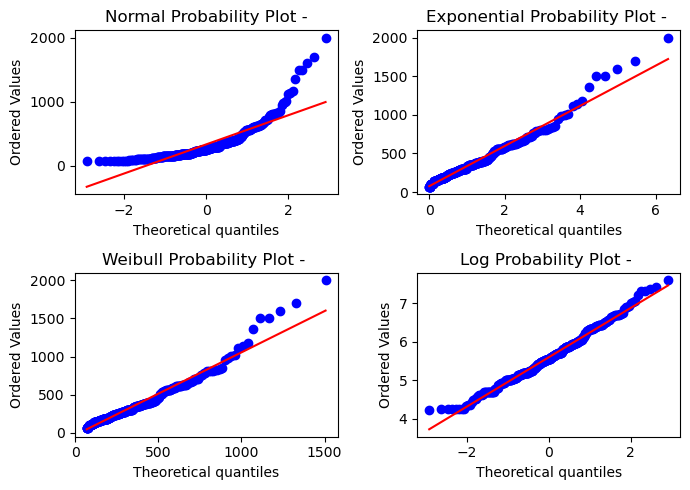

The skewness of the data is :2.58 , the kurtosis of the data is :9.53


In [42]:
plotPredictionGraphs('Horsepower',plotTypes,df_cars)

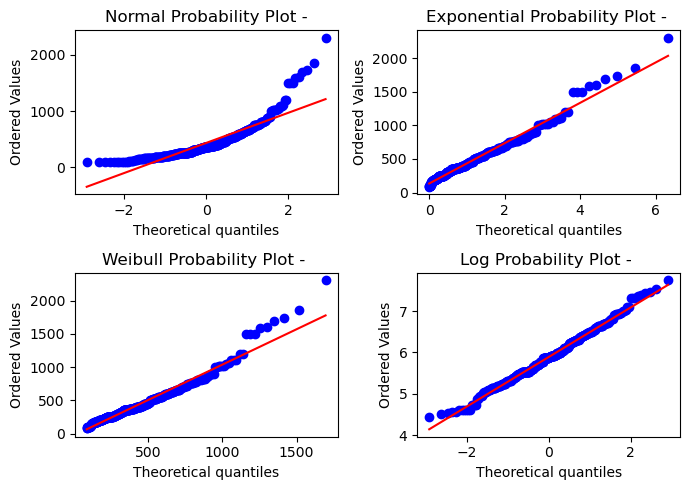

The skewness of the data is :2.3 , the kurtosis of the data is :7.8


In [43]:
plotPredictionGraphs('Torque',plotTypes,df_cars)

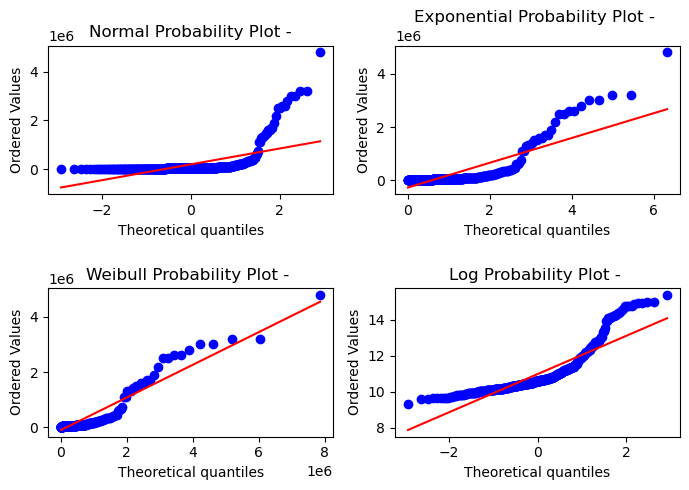

The skewness of the data is :4.6 , the kurtosis of the data is :23.64


In [44]:
plotPredictionGraphs('Price',plotTypes,df_cars)

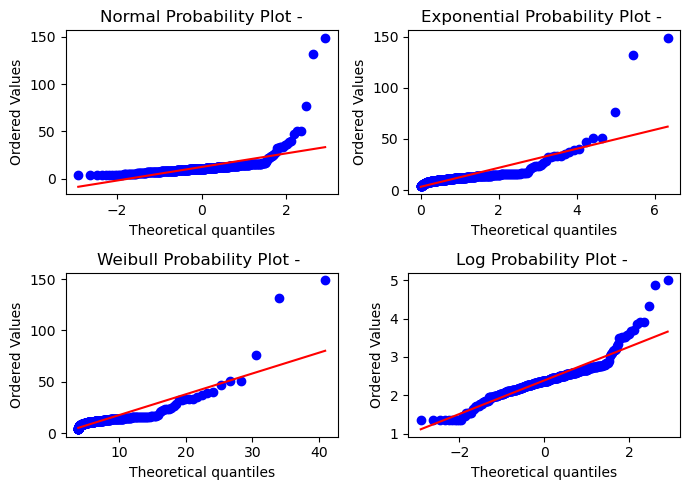

The skewness of the data is :7.95 , the kurtosis of the data is :80.77


In [45]:
plotPredictionGraphs('Fuel Economy',plotTypes,df_cars)

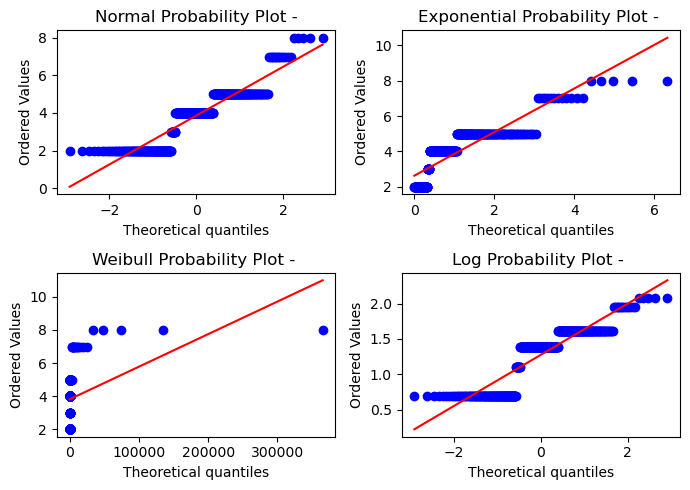

The skewness of the data is :0.22 , the kurtosis of the data is :-0.1


In [46]:
plotPredictionGraphs('Number of Doors',plotTypes,df_cars)

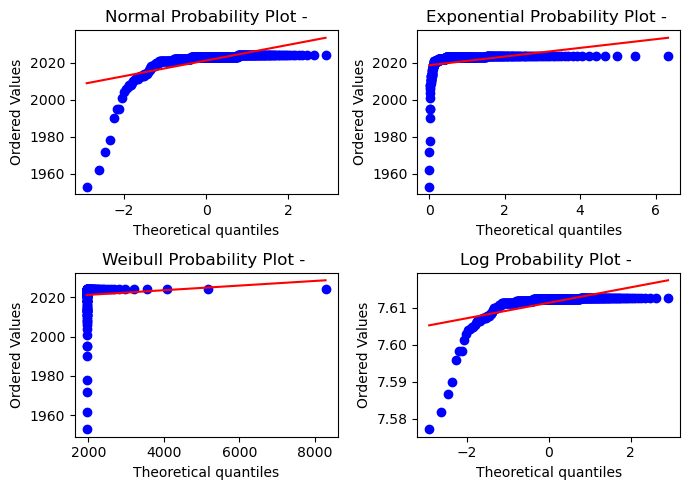

The skewness of the data is :-6.16 , the kurtosis of the data is :46.0


In [47]:
plotPredictionGraphs('Model Year Range',plotTypes,df_cars)

C:\Users\chaan\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\chaan\anaconda3\lib\site-packages\numpy\lib\function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


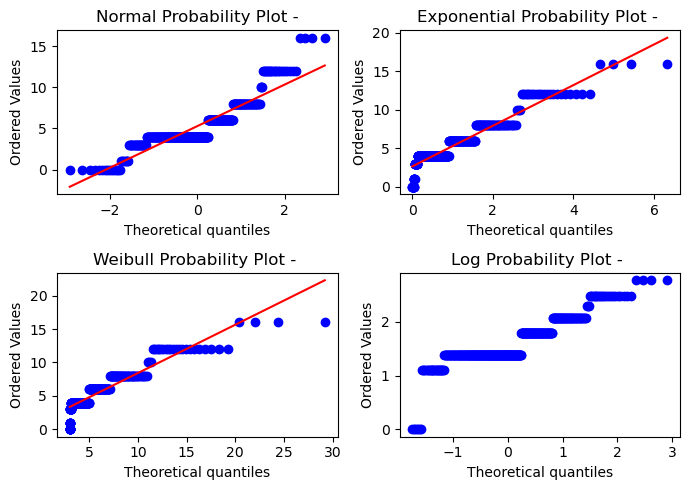

The skewness of the data is :1.21 , the kurtosis of the data is :2.4


In [48]:
plotPredictionGraphs('Number of Cylinders',plotTypes,df_cars)

<h3> Description of best probabilty plots of each column</h3>

In [49]:
df_data = pd.DataFrame()

In [50]:
df_data['Horsepower'] = ['Log Probability Plot' , 2.58 , 9.53 ]
df_data['Torque'] = ['Log Probability Plot' ,2.3 ,7.8]
df_data['Price'] = ['Log Probability Plot' ,4.6 ,23.63]
df_data['Fuel Economy'] = ['Log Probability Plot' ,7.95 ,80.77]
df_data['Number of Doors'] = ['Normal Probabilty Plot',0.22,-0.11]
df_data['Model Year Range'] = ['Normal Probabilty Plot',-6.16,46.0]
df_data['Number of Cylinders'] = ['Normal Probabilty Plot',1.21,2.4]
# End of code I wrote

In [51]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [52]:
print(df_data)

             Horsepower                Torque                 Price  \
0  Log Probability Plot  Log Probability Plot  Log Probability Plot   
1                  2.58                   2.3                   4.6   
2                  9.53                   7.8                 23.63   

           Fuel Economy         Number of Doors        Model Year Range  \
0  Log Probability Plot  Normal Probabilty Plot  Normal Probabilty Plot   
1                  7.95                    0.22                   -6.16   
2                 80.77                   -0.11                    46.0   

      Number of Cylinders  
0  Normal Probabilty Plot  
1                    1.21  
2                     2.4  


<h4>The following values skewness are skewed to the right : </h4>

<p> 1) Price</p>
<p> 2) Fuel Economy</p>

<p>This means the values are more to the left with extreme values to the right , the values have a heavy tail and sharp peak meaning there are more outliers then normal values in the data. </p>

    

<h4>The following values skweness are close to symmetric distribution :</h4>

<p> 1) Horsepower</p>
<p> 2) Torque</p>
<p> 3) Number of Cylinders</p>
<p> 4) Number of Doors</p>


<p> These values are good for a linear regression model </p>

<h4>The following data has kurtosis that indicate extreme dataset outlier values: </h4>

<p> 1) Price </p>
<p> 2) Fuel Economy </p>
<p> 3) Model Year Range </p>

<h4>The following data has kurtosis that indicate similar to normal data  </h4>

<p> 1) Horsepower </p>
<p> 2) Torque </p>
<p> 3) Number of doors </p>
<p> 4) Number of cylinders </p>

<h3>5)Visualize key data series </h3>

The following plot shows how similar both torque and horsepower values are when compared to each other

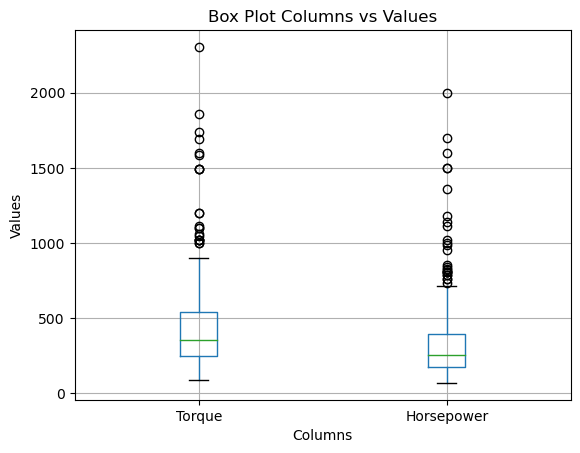

In [53]:

df_cars.boxplot(['Torque','Horsepower'])
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot Columns vs Values')
plt.show()

The following code plots the number of cylinders vs the model year range , from this we can see that older models did not have the diversity of engines used.

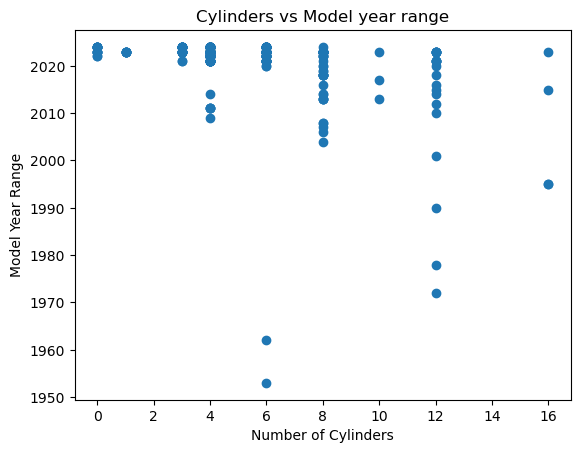

In [54]:
plt.scatter( df_cars['Number of Cylinders'], df_cars['Model Year Range'])
plt.xlabel('Number of Cylinders')
plt.ylabel('Model Year Range')
plt.title('Cylinders vs Model year range')
plt.show()

From the below code we can see the model year range does not effect the price greatly and is irrelevant if it is old or new , the cars price can be both high and low

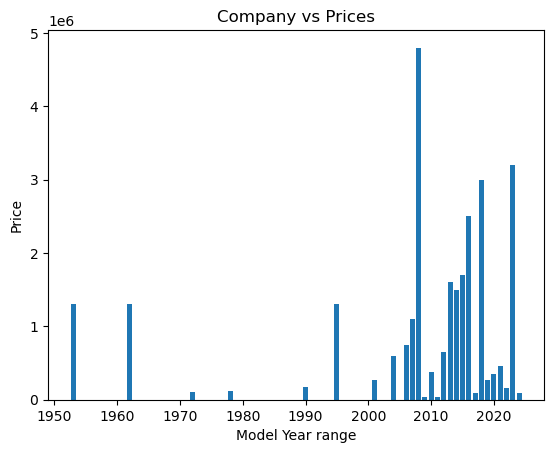

In [55]:
plt.bar(df_cars['Model Year Range'], df_cars['Price'])
plt.xlabel('Model Year range')
plt.ylabel('Price')
plt.title('Company vs Prices' )
plt.show()

From the plot below we can see that having less cylinders will result in a much better fuel economy.

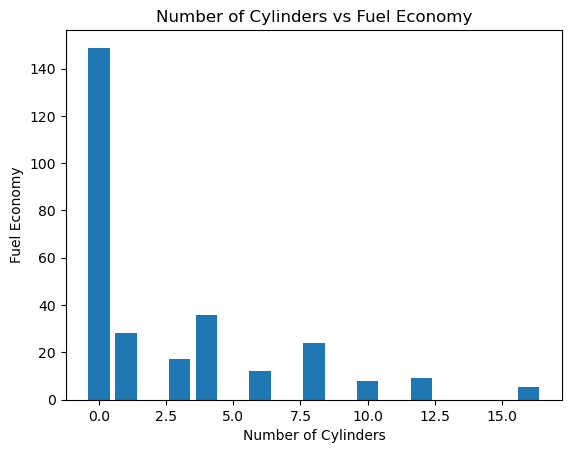

In [56]:
plt.bar(df_cars['Number of Cylinders'], df_cars['Fuel Economy'])
plt.xlabel('Number of Cylinders')
plt.ylabel('Fuel Economy')
plt.title('Number of Cylinders vs Fuel Economy' )
plt.show()

<h3>6)Data Regression Model </h3>

The features selected for the linear regression model will be :
<p> 1) Horsepower </p>
<p> 2) Price </p>
<p> 3) Number of Cylinders </p>
<p> 4) Number of Doors </p>
<p> 4) Fuel Economy </p>


<p> The reason for this being that they are the closest values to normal distribution with regards to kurtosis and skewness, furthermore they mostly share the same probability plots and data consistency in the database.

In [57]:
# I wrote this code

targetSeries = df_cars['Price']
featureSeries = df_cars[['Horsepower','Number of Cylinders','Number of Doors' , 'Fuel Economy']]


In [58]:
# split the data for validation

X_train, X_test, y_train, y_test = train_test_split(featureSeries, targetSeries, test_size=0.5,random_state=5)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (193, 4)
x test:  (194, 4)
y train:  (193,)
y test:  (194,)


In [59]:
# set model as linear regression model
model = LinearRegression()

In [60]:
# train the model
model.fit(X_train,y_train)

LinearRegression()

In [61]:
# make predictions with trained model
y_pred = model.predict(X_test)

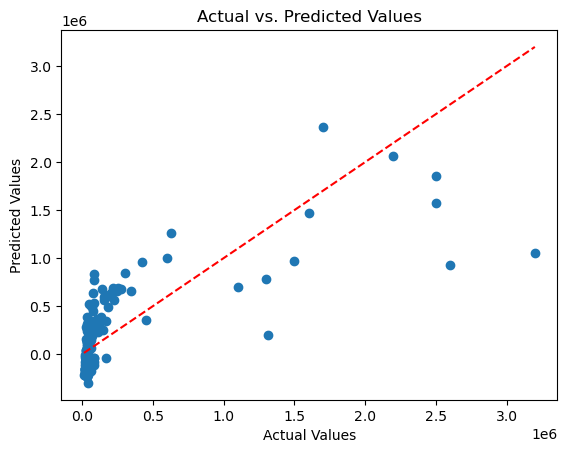

In [62]:
# plot predicted vs actual values with reference line

plt.scatter(y_test, y_pred)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add a diagonal line to show perfect values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

plt.show()


# End of code I wrote

In [63]:
# calculate evaluation metrics
mean_absolute = mean_absolute_error(y_test, y_pred)
mean_squared = mean_squared_error(y_test, y_pred)
root_Mean = np.sqrt(mean_squared)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mean_absolute)
print("Mean Squared Error (MSE):", mean_squared)
print("Root Mean Squared Error (RMSE):", root_Mean)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 211456.7161681457
Mean Squared Error (MSE): 106455478488.45079
Root Mean Squared Error (RMSE): 326275.1576330181
R-squared (R^2): 0.519349202116095


As we can see the model does not fit the data as expected. Further pre-processing or feature engineering will be required to improve the model further. The data is as clean and prepared as could be but possible the data suggests that cars have pricing which cannot be explained always. The model could be improved if there were more linear features of each car which possibly have a stronger linear tendancy then the metrics used.

<h3> 7)Model Validation</h3>

The following cross validation for the model has achieved 50% mean score for cross validation , meaning it explains approximately 50% of the values in the target variable. There is no baseline score to evaluate the models performance on the dataset since there has never been a notebook implemented and published on the dataset. 

In [68]:
# i wrote this code

crossValArray = []
cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
cv_mean = cross_val.mean()
crossValArray.append(round(cv_mean,2))

print("Train CV scores :",cross_val)
print("Train CV mean :",round(cv_mean,2))

# End of Code I wrote

Train CV scores : [0.83114753 0.2761444  0.51068458 0.59129937 0.293244  ]
Train CV mean : 0.5


<h3>8)Feature Engineering</h3>

 Your model would benefit from using feature engineering techniques or polynomial
features as described in Topic 5.4. Implement these techniques and re-evaluate your model.

In [88]:
df_string = df_cars['Company']
df_numerical = df_cars[['Horsepower','Number of Cylinders','Number of Doors' , 'Fuel Economy']]

In [89]:
df_combined = pd.concat([df_numerical, df_string], axis=1)   

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_combined, df_cars['Price'], test_size=0.5, random_state=5)

In [91]:
vec = TfidfVectorizer()

In [92]:
# I DID NOT write this code the below code was generated by chatGPT
X_train_string_vectorized = vec.fit_transform(X_train['Company'])
X_test_string_vectorized = vec.transform(X_test['Company'])

In [93]:
X_train_vectorized = sp.hstack((X_train[['Horsepower','Number of Cylinders','Number of Doors' , 'Fuel Economy']], X_train_string_vectorized))
X_test_vectorized = sp.hstack((X_test[['Horsepower','Number of Cylinders','Number of Doors' , 'Fuel Economy']], X_test_string_vectorized))
# END OF CODE I DID NOT WRITE

In [94]:
# I wrote this code
model = LinearRegression()
model.fit(X_train_vectorized, y_train)

LinearRegression()

In [95]:
y_pred = model.predict(X_test_vectorized)

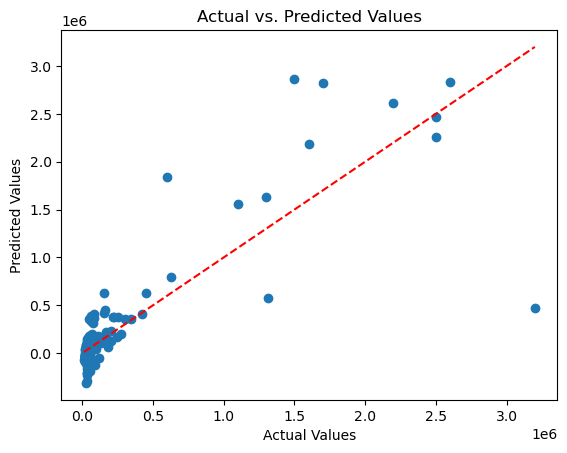

In [96]:
# plot predicted vs actual values with reference line

plt.scatter(y_test, y_pred)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add a diagonal line to show perfect values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

plt.show()


# End of code I wrote

In [97]:
# calculate evaluation metrics
mean_absolute = mean_absolute_error(y_test, y_pred)
mean_squared = mean_squared_error(y_test, y_pred)
root_Mean = np.sqrt(mean_squared)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mean_absolute)
print("Mean Squared Error (MSE):", mean_squared)
print("Root Mean Squared Error (RMSE):", root_Mean)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 123553.97622076914
Mean Squared Error (MSE): 82424014983.55539
Root Mean Squared Error (RMSE): 287095.8289205111
R-squared (R^2): 0.6278522333546332


Using feature engineering by adding TfidVectorizer to the "Company" string has significantly improved the model. I implemented the same model but added the "Company" string column and used the vectorizer on it. It might be worth implementing other features like transmission type for example.

<h3>10) Evaluation</h3>

<p>The dataset used was very inconsistent and therefore led to the extensive pre-processing steps. I wanted to be the first person to implement a linear regression algorithm on the dataset , however it is clear that the data is lacking and the models performance is sub-par. Thje initial model values before feature engineering were as follows: </p>
<p>
</p>
<p> Mean Absolute Error (MAE): 211456.7161681457 </p>
<p> Mean Squared Error (MSE): 106455478488.45079 </p>
<p> Root Mean Squared Error (RMSE): 326275.1576330181 </p>
<p> R-squared (R^2): 0.519349202116095 </p>
<p>
</p>
<p>
Meaning the predicted values deviated $211456.71 on average from a value , the large MSE value indicates that there are many errors in the prediction values , the RMSE is an average magnitude of prediction errors which is also high. These values are very high and therefore the model does not perform well as a linear regression model. The R-squared value suggests 52 percent of the variance in the price variable is correctly explained by the linear regression model. After feature engineering  was implemented the results were as follow : 
</p>
<p>
</p>
<p> Mean Absolute Error (MAE): 123553.97622076914 </p>
<p> Mean Squared Error (MSE): 82424014983.55539 </p> 
<p> Root Mean Squared Error (RMSE): 287095.8289205111 </p>
<p> R-squared (R^2): 0.6278522333546332 </p>
<p>
</p>
<p>
This means that after feature engineering the MAE was nearly halved ,the mean squared error is also much less as well as the root mean squared error. The r-squared value is also 10 % better then before feature engineering. My final conclusion is that the dataset require more features that have a linear relationship to pricing of a car , the linear regression model underperforms and more pre-processing or feature engineering would be required to improve the model further. 


